<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## RNN one-to-one

#### Datos
El objecto es utilizar una serie de sucuencias númericas (datos sintéticos) para poner a prueba el uso de las redes RNN. Este ejemplo se inspiró en otro artículo, lo tienen como referencia en el siguiente link:\
[LINK](https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras/)

In [4]:
import re

import numpy as np
import pandas as pd

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, SimpleRNN
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate
from keras.layers import Bidirectional

In [5]:
# Generar datos sintéticos
X = list()
y = list()
X = [x+1 for x in range(20)]

# "y" (target) se obtiene como cada dato de entrada multiplicado por 15
y = [x * 15 for x in X]

print("datos X:", X)
print("datos y:", y)

datos X: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
datos y: [15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300]


In [6]:
# Cada dato X lo transformarmos en una matriz de 1 fila 1 columna (1x1)
X = np.array(X).reshape(len(X), 1, 1)
print("datos X:", X)

datos X: [[[ 1]]

 [[ 2]]

 [[ 3]]

 [[ 4]]

 [[ 5]]

 [[ 6]]

 [[ 7]]

 [[ 8]]

 [[ 9]]

 [[10]]

 [[11]]

 [[12]]

 [[13]]

 [[14]]

 [[15]]

 [[16]]

 [[17]]

 [[18]]

 [[19]]

 [[20]]]


In [7]:
y = np.asanyarray(y)
y.shape

(20,)

### 2 - Entrenar el modelo (RNN y LSTM)

In [8]:
input_shape = X[0].shape
input_shape

(1, 1)

In [9]:
output_shape = 1

In [10]:
# Comenzamos con una RNN clásica
# En general una celda RNN clásica ya no se utiliza, es solo a modo de ejemplo
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=input_shape))
model.add(Dense(output_shape))
model.compile(loss='mse',
              optimizer="Adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
hist = model.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
4/4 [==============================] - 3s 143ms/step - loss: 20887.4062 - val_loss: 76447.8828
Epoch 2/500
4/4 [==============================] - 0s 18ms/step - loss: 20774.1309 - val_loss: 76035.3438
Epoch 3/500
4/4 [==============================] - 0s 13ms/step - loss: 20664.4688 - val_loss: 75649.9062
Epoch 4/500
4/4 [==============================] - 0s 13ms/step - loss: 20549.9512 - val_loss: 75262.7969
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 20453.2344 - val_loss: 74859.5938
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 20330.3672 - val_loss: 74472.5391
Epoch 7/500
4/4 [==============================] - 0s 21ms/step - loss: 20226.3926 - val_loss: 74062.4375
Epoch 8/500
4/4 [==============================] - 0s 12ms/step - loss: 20102.7832 - val_loss: 73653.6797
Epoch 9/500
4/4 [==============================] - 0s 11ms/step - loss: 19987.1895 - val_loss: 73237.4531
Epoch 10/500
4/4 [===========================

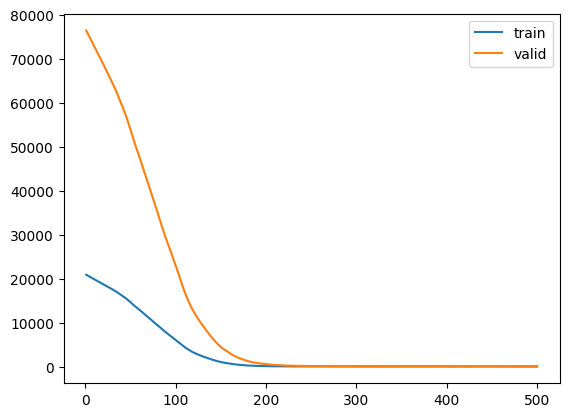

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_loss'], label='valid')
plt.show()

In [13]:
# Ensayo
# x = 30
# y_test = x * 15

x_test = 30
y_test = x_test * 15
test_input = np.array([x_test])
test_input = test_input.reshape((1, 1, 1))
y_hat = model.predict(test_input, verbose=0)[0][0]

print("y_test:", y_test)
print("y_hat:", y_hat)

model.evaluate(test_input, np.array([y_test]))

y_test: 450
y_hat: 431.7013
1/1 [==============================] - 0s 27ms/step - loss: 334.8427


334.8426513671875

In [14]:
# Ahora probaremos con LSTM, qué es más compleja y por lo tanto
# requiere más parámetros a entrenar
model2 = Sequential()
model2.add(LSTM(64, activation='relu', input_shape=input_shape))
model2.add(Dense(output_shape))
model2.compile(loss='mse',
              optimizer="Adam")
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
hist2 = model2.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
4/4 [==============================] - 2s 109ms/step - loss: 21030.8574 - val_loss: 77112.2188
Epoch 2/500
4/4 [==============================] - 0s 14ms/step - loss: 20999.7090 - val_loss: 76996.4531
Epoch 3/500
4/4 [==============================] - 0s 13ms/step - loss: 20966.3906 - val_loss: 76889.4297
Epoch 4/500
4/4 [==============================] - 0s 15ms/step - loss: 20937.9883 - val_loss: 76777.3438
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 20908.4473 - val_loss: 76655.8281
Epoch 6/500
4/4 [==============================] - 0s 13ms/step - loss: 20874.5625 - val_loss: 76529.5234
Epoch 7/500
4/4 [==============================] - 0s 24ms/step - loss: 20839.8457 - val_loss: 76399.2656
Epoch 8/500
4/4 [==============================] - 0s 14ms/step - loss: 20807.3203 - val_loss: 76256.2031
Epoch 9/500
4/4 [==============================] - 0s 12ms/step - loss: 20766.7070 - val_loss: 76110.8828
Epoch 10/500
4/4 [===========================

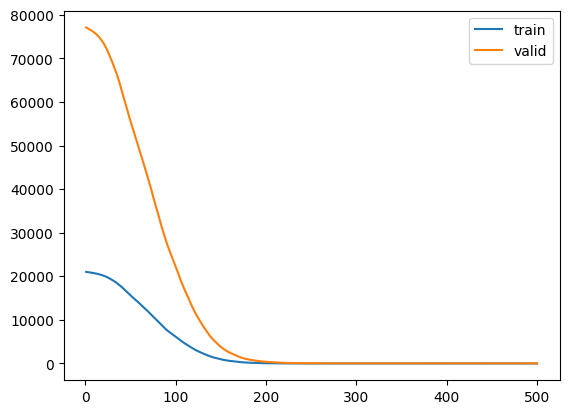

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist2.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist2.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist2.history['val_loss'], label='valid')
plt.show()

In [17]:
# Ensayo
# x = 30
# y_test = x * 15

x_test = 30
y_test = x_test * 15
test_input = np.array([x_test])
test_input = test_input.reshape((1, 1, 1))
y_hat = model2.predict(test_input, verbose=0)[0][0]

print("y_test:", y_test)
print("y_hat:", y_hat)

model2.evaluate(test_input, np.array([y_test]))

y_test: 450
y_hat: 433.22598
1/1 [==============================] - 0s 25ms/step - loss: 281.3676


281.3676452636719

Se puede observar que para un problema tan simple como este no hay mucha diferencia entre utilizar una RNN o LSTM.

### 3 - Multi-layer LSTM

In [18]:
# En esta oportunidad se utilizarán dos layer LSTM. Para poder conectar
# la primera layer con la segunda se debe colocar return_sequences=True

model3 = Sequential()
model3.add(LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape))
model3.add(LSTM(64, activation='relu'))
model3.add(Dense(output_shape))
model3.compile(loss='mse',
              optimizer="Adam")

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1, 64)             16896     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49985 (195.25 KB)
Trainable params: 49985 (195.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
hist3 = model3.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
4/4 [==============================] - 3s 132ms/step - loss: 21041.3652 - val_loss: 77260.6094
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 21027.8711 - val_loss: 77211.4219
Epoch 3/500
4/4 [==============================] - 0s 12ms/step - loss: 21016.6016 - val_loss: 77167.7031
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 21006.8281 - val_loss: 77123.2812
Epoch 5/500
4/4 [==============================] - 0s 12ms/step - loss: 20994.6602 - val_loss: 77072.2656
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 20982.0078 - val_loss: 77005.5312
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 20966.5020 - val_loss: 76921.1875
Epoch 8/500
4/4 [==============================] - 0s 12ms/step - loss: 20947.9746 - val_loss: 76812.0078
Epoch 9/500
4/4 [==============================] - 0s 12ms/step - loss: 20921.9551 - val_loss: 76663.8828
Epoch 10/500
4/4 [===========================

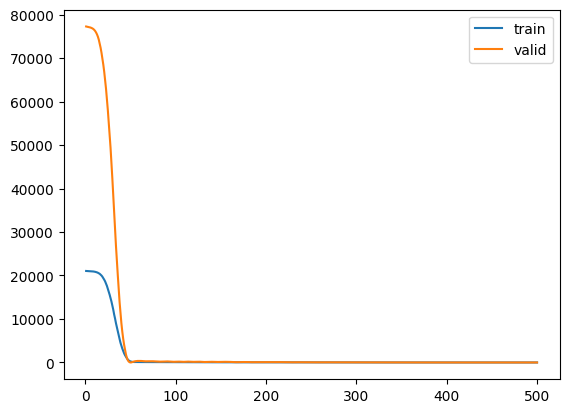

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist3.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist3.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist3.history['val_loss'], label='valid')
plt.show()

In [21]:
# Ensayo
# x = 30
# y_test = x * 15

x_test = 30
y_test = x_test * 15
test_input = np.array([x_test])
test_input = test_input.reshape((1, 1, 1))
y_hat = model3.predict(test_input, verbose=0)[0][0]

print("y_test:", y_test)
print("y_hat:", y_hat)

model3.evaluate(test_input, np.array([y_test]))

y_test: 450
y_hat: 446.1775
1/1 [==============================] - 0s 40ms/step - loss: 14.6116


14.611580848693848

### 4 - Conclusión
Implementar un modelo basado en RNN o LSTM es muy sensillo, hay que tener en cuenta que al apilar varias layers hay que colocar el flag "return_sequence" en "True".
El resultado alcanzado es bueno pero podría mejorarse agregando más layer LSTM o más layer Densas